In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df_with_lyrics.csv")


/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/4096071209.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_with_lyrics.csv")


In [3]:
# General structure and types
print(df.info())

# Summary statistics
print(df.describe(include="all"))

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Duplicates
print("Number of duplicates:", df.duplicated().sum())

# Lyrics length in characters
df["lyrics_length"] = df["lyrics"].astype(str).str.len()
print("Lyrics length (characters):\n", df["lyrics_length"].describe())

# Gender distribution
print("Gender counts:\n", df["gender"].value_counts())

# Year range
print("Year range:\n", df["year"].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112518 entries, 0 to 112517
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 112518 non-null  object 
 1   name               112518 non-null  object 
 2   album              112518 non-null  object 
 3   album_id           112518 non-null  object 
 4   artists            112518 non-null  object 
 5   artist_ids         112518 non-null  object 
 6   track_number       112518 non-null  int64  
 7   disc_number        112518 non-null  int64  
 8   explicit           112518 non-null  bool   
 9   danceability       112518 non-null  float64
 10  energy             112518 non-null  float64
 11  key                112518 non-null  int64  
 12  loudness           112518 non-null  float64
 13  mode               112518 non-null  int64  
 14  speechiness        112518 non-null  float64
 15  acousticness       112518 non-null  float64
 16  in

In [4]:
# Word count per song
df["word_count"] = df["lyrics"].astype(str).apply(lambda x: len(x.split()))

# Average lyrics length per gender
print("Average lyrics length:\n", df.groupby("gender")["lyrics_length"].mean())

# Word count statistics by gender
print("Word count by gender:\n", df.groupby("gender")["word_count"].describe())

# Explicit songs by gender
print("Proportion of explicit songs:\n", df.groupby("gender")["explicit"].mean())


Average lyrics length:
 gender
female            221.867807
male              178.528792
non-binary        459.064315
not applicable      3.000000
other             238.885965
Name: lyrics_length, dtype: float64
Word count by gender:
                   count       mean         std  min  25%  50%    75%      max
gender                                                                       
female          23269.0  42.141648  130.303530  1.0  1.0  1.0    1.0  12033.0
male            88636.0  34.464112  143.435044  1.0  1.0  1.0    1.0  22078.0
non-binary        482.0  88.487552  219.823386  1.0  1.0  1.0    1.0   1655.0
not applicable     17.0   1.000000    0.000000  1.0  1.0  1.0    1.0      1.0
other             114.0  44.614035   72.407097  1.0  1.0  1.0  106.5    236.0
Proportion of explicit songs:
 gender
female            0.020972
male              0.041349
non-binary        0.207469
not applicable    0.000000
other             0.000000
Name: explicit, dtype: float64


In [5]:
# Drop entries with missing lyrics or gender
df_clean = df.dropna(subset=["lyrics", "gender"])

# Remove entries with gender = "Unknown"
df_clean = df_clean[df_clean["gender"].str.lower() != "Other"]

# Filter out very short lyrics
df_clean = df_clean[df_clean["word_count"] > 20]

print("Remaining valid songs for text analysis:", len(df_clean))


Remaining valid songs for text analysis: 13655


### Tokenization

In [6]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from langdetect import detect

# --- Function Definitions ---

def clean_lyrics(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove e.g. [Chorus], [Verse 1]
    text = re.sub(r'[^a-zA-ZäöüÄÖÜß\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()

# Function for language detection
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

In [7]:
# Create the 'lyrics_clean' column
df['lyrics_clean'] = df['lyrics'].apply(clean_lyrics)

In [8]:

#  Detect language
df['language'] = df['lyrics_clean'].apply(detect_language)



In [9]:
df_es = df[df['language'] == 'es'].copy()


In [10]:
# Average lyrics length per gender
print("Average lyrics length:\n", df_es.groupby("gender")["lyrics_length"].mean())

df_es['gender'].value_counts()


Average lyrics length:
 gender
female        1271.817116
male          1534.961044
non-binary    1374.285714
other          816.531250
Name: lyrics_length, dtype: float64


gender
male          2567
female         853
other           32
non-binary       7
Name: count, dtype: int64

Artists by Country (Spanish dataset):
country
ES    1208
MX    1057
PR     939
US      67
BR      56
CA      49
IT      17
JP      13
SE      11
GB      10
Name: count, dtype: int64


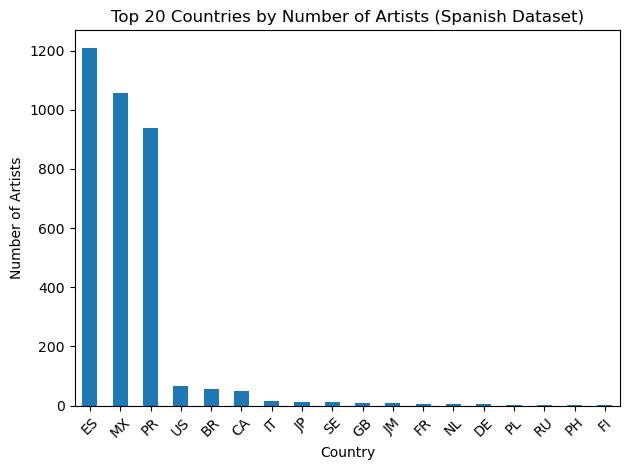

In [11]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# artist per country
country_counts_es = df_es['country'].value_counts()
print("Artists by Country (Spanish dataset):")
print(country_counts_es.head(10))

country_counts_es.head(20).plot(kind='bar')
plt.title("Top 20 Countries by Number of Artists (Spanish Dataset)")
plt.ylabel("Number of Artists")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



 Artists by Gender (Spanish dataset):
gender
male          2567
female         853
other           32
non-binary       7
Name: count, dtype: int64


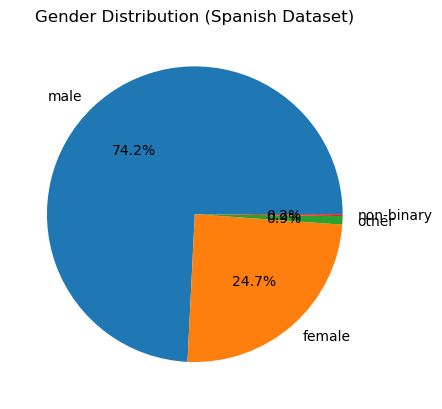

In [12]:
# Distribution by Gender
if 'gender' in df_es.columns:
    gender_counts_es = df_es['gender'].value_counts()
    print(" Artists by Gender (Spanish dataset):")
    print(gender_counts_es)

    gender_counts_es.plot(kind='pie', autopct='%1.1f%%')
    plt.title("Gender Distribution (Spanish Dataset)")
    plt.ylabel("")
    plt.show()
else:
    print("Column 'gender' not found in df_es.")


Popularity - Summary Statistics (Spanish dataset):
count    3459.000000
mean       64.993351
std        14.448137
min         2.000000
25%        55.000000
50%        67.000000
75%        76.000000
max       100.000000
Name: artist_popularity, dtype: float64


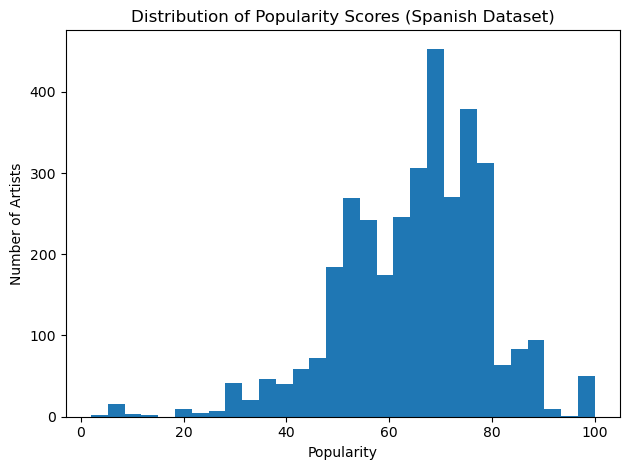

In [13]:
# Distribution Popularity
if 'artist_popularity' in df_es.columns:
    print("Popularity - Summary Statistics (Spanish dataset):")
    print(df_es['artist_popularity'].describe())

    plt.hist(df_es['artist_popularity'], bins=30)
    plt.title("Distribution of Popularity Scores (Spanish Dataset)")
    plt.xlabel("Popularity")
    plt.ylabel("Number of Artists")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'artist_popularity' not found in df_es.")


Most Common Genres (Spanish Dataset):
['latin pop']                                                                314
['salsa', 'salsa romantica', 'merengue']                                     205
['mariachi', 'ranchera', 'música mexicana', 'bolero']                        199
['mariachi', 'ranchera', 'bolero', 'música mexicana']                        176
['bolero']                                                                   139
['trova', 'nueva trova', 'singer-songwriter', 'bolero']                      135
['flamenco', 'flamenco pop']                                                 130
['reggaeton']                                                                125
['trova', 'nueva trova', 'singer-songwriter']                                124
['trova', 'singer-songwriter', 'nueva trova']                                 96
['reggaeton', 'trap latino', 'urbano latino', 'latin']                        69
['reggaeton', 'urbano latino']                                         

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/1294693345.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


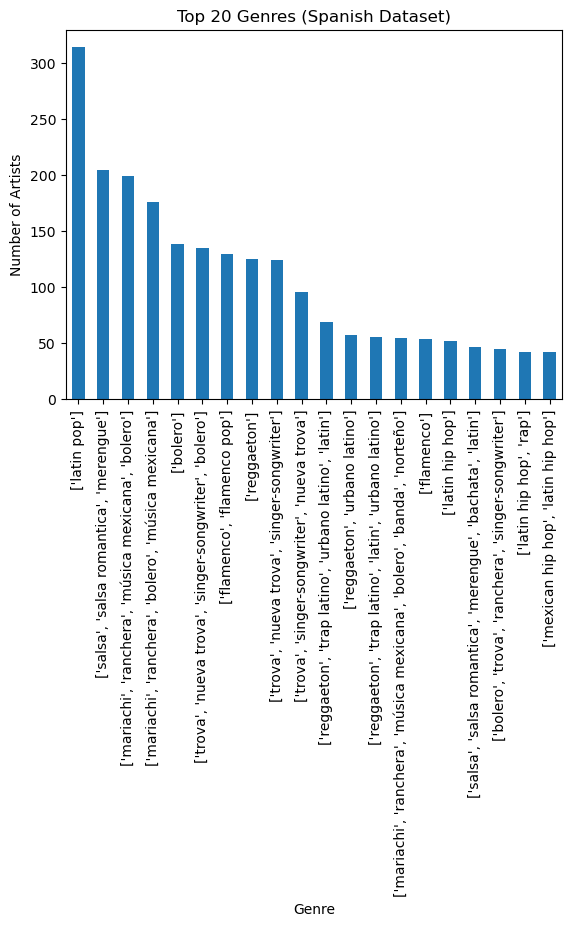

In [14]:
# distribtion Genres
if 'artist_genres' in df_es.columns:
    all_genres_es = df_es['artist_genres'].explode()
    genre_counts_es = Counter(all_genres_es)
    top_genres_es = pd.Series(dict(genre_counts_es)).sort_values(ascending=False).head(20)

    print("Most Common Genres (Spanish Dataset):")
    print(top_genres_es)

    top_genres_es.plot(kind='bar')
    plt.title("Top 20 Genres (Spanish Dataset)")
    plt.ylabel("Number of Artists")
    plt.xlabel("Genre")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'artist_genres' not found in df_es.")

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

# Spanish stopwords 
stop_words = set(stopwords.words('spanish'))

# Preprocessing-Function spanish
def preprocess_lyrics_es(text):
    if pd.isna(text):
        return []

    tokens = word_tokenize(text, language='spanish')
    tokens = [t.lower() for t in tokens if t.lower() not in stop_words and len(t) > 2]
    return tokens



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sophiekersten/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sophiekersten/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df_es = df[df['language'] == 'es'].copy()
df_es['tokens'] = df_es['lyrics'].apply(preprocess_lyrics_es)


In [17]:
import pandas as pd
from transformers import pipeline
import torch
from tqdm.auto import tqdm

# --- Configuration ---
LYRICS_COLUMN = 'lyrics'
YEAR_COLUMN = 'year'
GENDER_COLUMN = 'gender'

NUM_SONGS_TO_PROCESS = None

# Output files for Spanish lyrics
OUTPUT_FILE_STEP1 = 'song_lyrics_es_prepared.csv'
OUTPUT_FILE_STEP2_NER = 'song_lyrics_es_with_ner.csv'
OUTPUT_FILE_STEP3_PRONOUNS = 'song_lyrics_es_with_pronouns.csv'
OUTPUT_FILE_STEP4_INTENTIONS = 'song_lyrics_es_with_bert_analysis_final.csv'
OUTPUT_FILE_STEP4_EMOTION = 'song_lyrics_es_with_bert_emotion_final.csv'


print("--- Part 1: Loading and Preparing Spanish Lyrics Data ---")


if 'df_es' not in locals() and 'df_es' not in globals():
    print("Error: DataFrame 'df_es' not found. Please load your data into 'df_es' first.")
    exit()

for col in [LYRICS_COLUMN, YEAR_COLUMN, GENDER_COLUMN]:
    if col not in df_es.columns:
        print(f"Error: The column '{col}' was not found in the DataFrame 'df_es'.")
        print(f"Available columns: {df_es.columns.tolist()}")
        exit()

# Clean and prepare the data
df_es.dropna(subset=[LYRICS_COLUMN], inplace=True)
df_es[LYRICS_COLUMN] = df_es[LYRICS_COLUMN].astype(str)

if df_es.empty:
    print("The DataFrame is empty after cleaning. Please check your data.")
    exit()

df_es[YEAR_COLUMN] = pd.to_numeric(df_es[YEAR_COLUMN], errors='coerce')
df_es.dropna(subset=[YEAR_COLUMN], inplace=True)

# Select sample if defined
if NUM_SONGS_TO_PROCESS is not None:
    df_es = df_es.head(NUM_SONGS_TO_PROCESS).copy()
    print(f"Processing a sample of {len(df_es)} Spanish songs.")
else:
    print(f"Processing all {len(df_es)} Spanish songs.")

print("Spanish lyrics data preparation complete.")
print(df_es.head())

# Save the prepared DataFrame
df_es.to_csv(OUTPUT_FILE_STEP1, index=False)
print(f"Prepared DataFrame saved to {OUTPUT_FILE_STEP1}")

tqdm.pandas()


--- Part 1: Loading and Preparing Spanish Lyrics Data ---
Processing all 3459 Spanish songs.
Spanish lyrics data preparation complete.
                          id                          name  \
3004  3Aj45ui1fLUaDLwzYGZ9MP                         Juego   
3006  58IldxfCQeWP8JfIMOcgVB  Ugly (Fea) - Spanish Version   
3011  0ftP0HrE7xbo81SAwq9HXu                     Sin miedo   
3013  1AzcYMcgBhOL6jV5XThXIf                      Atención   
3338  7tIWYkTDpZmaHlwp0j3HwG           Emociones (Emoçoes)   

                                               album                album_id  \
3004                                          Kisses  5yV6JVfsLGdi3QMclVkvMW   
3006  UglyDolls (Original Motion Picture Soundtrack)  27RUK36qlkCtwySz0pBQXq   
3011                                          Kisses  5yV6JVfsLGdi3QMclVkvMW   
3013                                          Kisses  5yV6JVfsLGdi3QMclVkvMW   
3338                 Pra Sempre Em Espanhol - Vol. 2  7tgwXjkq9Km7n7pwiAhLyK   

           

In [18]:
# --- Part 2: Applying BERT for Named Entity Recognition (NER) on Spanish Lyrics ---

import pandas as pd
from transformers import pipeline
import torch
from tqdm.auto import tqdm

# --- Configuration ---
LYRICS_COLUMN = 'lyrics'
OUTPUT_FILE_STEP1 = 'song_lyrics_prepared.csv'
OUTPUT_FILE_STEP2_NER = 'song_lyrics_with_ner.csv'

# Load the prepared DataFrame
try:
    df_es = pd.read_csv(OUTPUT_FILE_STEP1)
    df_es[LYRICS_COLUMN] = df_es[LYRICS_COLUMN].astype(str)
    print(f"Loaded DataFrame for NER from {OUTPUT_FILE_STEP1}. Number of songs: {len(df_es)}")
except FileNotFoundError:
    print(f"Error: Could not load {OUTPUT_FILE_STEP1}. Please run Part 1 first.")
    exit()

# Load the NER pipeline
print("\n--- Applying BERT for Named Entity Recognition (NER) ---")
try:
    ner_pipeline = pipeline(
        "ner",
        model="dslim/bert-base-NER",
        aggregation_strategy="simple",
        device=0 if torch.cuda.is_available() else -1
    )
    print(f"BERT NER Model loaded. Using device: {'GPU' if torch.cuda.is_available() else 'CPU'}")
except Exception as e:
    print(f"ERROR loading BERT NER Model: {e}")
    exit()

# Define the chunked NER function
def apply_ner(text, max_chunk_length=512):
    if not isinstance(text, str) or not text.strip():
        return []

    tokens = text.split()
    entities_all = []

    for i in range(0, len(tokens), max_chunk_length):
        chunk = " ".join(tokens[i:i + max_chunk_length])
        try:
            entities = ner_pipeline(chunk)
            person_entities = [
                {'word': ent['word'], 'score': ent['score'], 'entity_group': ent['entity_group']}
                for ent in entities if ent['entity_group'] == 'PER'
            ]
            entities_all.extend(person_entities)
        except Exception as e:
            print(f"NER chunk failed: {e}")
            continue

    return entities_all

# Apply NER
tqdm.pandas()
print(f"Applying NER to {len(df_es)} Spanish song lyrics in '{LYRICS_COLUMN}'...")
df_es['detected_entities'] = df_es[LYRICS_COLUMN].progress_apply(apply_ner)
print("NER analysis completed.")

# Save the results
df_es.to_csv(OUTPUT_FILE_STEP2_NER, index=False)
print(f"DataFrame with NER results saved to {OUTPUT_FILE_STEP2_NER}")



Loaded DataFrame for NER from song_lyrics_prepared.csv. Number of songs: 6840

--- Applying BERT for Named Entity Recognition (NER) ---


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


BERT NER Model loaded. Using device: CPU
Applying NER to 6840 Spanish song lyrics in 'lyrics'...


  0%|          | 0/6840 [00:00<?, ?it/s]

NER analysis completed.
DataFrame with NER results saved to song_lyrics_with_ner.csv


In [19]:
# --- Part 3: Simple Pronoun and Gender-Related Term Detection (Spanish) ---
try:
    df_es = pd.read_csv(OUTPUT_FILE_STEP2_NER)
    df_es[LYRICS_COLUMN] = df_es[LYRICS_COLUMN].astype(str)
    print(f"Loaded DataFrame for pronoun detection from {OUTPUT_FILE_STEP2_NER}. Number of songs: {len(df_es)}")
except FileNotFoundError:
    print(f"Error: Could not load {OUTPUT_FILE_STEP2_NER}. Please run Part 1 and Part 2 first.")
    exit()

print("\n--- Performing simple pronoun and gender-related term detection (Spanish) ---")

gender_pronouns_and_terms = {
    'male': ['él', 'lo', 'su', 'señor', 'chico', 'hombre', 'varón', 'tipo', 'padre', 'hermano', 'hijo', 'rey', 'príncipe', 'esposo', 'novio'],
    'female': ['ella', 'la', 'su', 'señora', 'chica', 'mujer', 'hembra', 'madre', 'hermana', 'hija', 'reina', 'princesa', 'esposa', 'novia'],
    'neutral': ['elle', 'persona', 'individuo', 'gente', 'pareja', 'amante', 'amigx', 'humano']
}

def find_pronouns_and_gender_terms(text):
    found_genders = {'male': [], 'female': [], 'neutral': []}
    words = text.lower().replace('.', '').replace(',', '').replace('!', '').replace('?', '').split()
    
    for word in words:
        if word in gender_pronouns_and_terms['male']:
            found_genders['male'].append(word)
        elif word in gender_pronouns_and_terms['female']:
            found_genders['female'].append(word)
        elif word in gender_pronouns_and_terms['neutral']:
            found_genders['neutral'].append(word)
            
    return {k: list(set(v)) for k, v in found_genders.items()}

print(f"Performing pronoun detection on {len(df_es)} Spanish song lyrics...")
df_es['detected_pronouns_and_terms'] = df_es[LYRICS_COLUMN].progress_apply(find_pronouns_and_gender_terms)
print("Pronoun and gender-related term detection completed.")
print(df_es.head())

# Save results
OUTPUT_FILE_STEP3_PRONOUNS = 'song_lyrics_with_pronouns_es.csv'
df_es.to_csv(OUTPUT_FILE_STEP3_PRONOUNS, index=False)
print(f"DataFrame with pronoun results saved to {OUTPUT_FILE_STEP3_PRONOUNS}")


Loaded DataFrame for pronoun detection from song_lyrics_with_ner.csv. Number of songs: 6840

--- Performing simple pronoun and gender-related term detection (Spanish) ---
Performing pronoun detection on 6840 Spanish song lyrics...


  0%|          | 0/6840 [00:00<?, ?it/s]

Pronoun and gender-related term detection completed.
                       id                                    name  \
0  3ZjmloY4fJkfs9qYH82Oau                                 Poquito   
1  326jKGa1FVqDF5Yeahq8Nn                  Ugly - English Version   
2  4cno0k9jDEFpLAQyHNjqVx  Tócame (feat. Arcangel & De La Ghetto)   
3  6532nOWtuYIzYaN44pcrHy                Amor Real - Holiday Song   
4  0sy2eLJB1o7Fa8kAc7gVzW                                  Notion   

                                            album                album_id  \
0                                          Kisses  5yV6JVfsLGdi3QMclVkvMW   
1  UglyDolls (Original Motion Picture Soundtrack)  27RUK36qlkCtwySz0pBQXq   
2          Tócame (feat. Arcangel & De La Ghetto)  6OW0sjGhqQJKxjcBzyvpcq   
3                        Amor Real (Holiday Song)  0X4nxSqynfCpG9LMJ9jK13   
4                                          Notion  3o4LAzf8y2BQ3eJ4fmIjvi   

                                  artists  \
0                  ['Ani

In [20]:
# --- Part 4: Applying BERT for Emotion Analysis ---
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm.auto import tqdm 

# --- Configuration for Spanish Data ---
LYRICS_COLUMN = 'lyrics' 
OUTPUT_FILE_STEP3_PRONOUNS_ES = 'song_lyrics_with_pronouns_es.csv'
OUTPUT_FILE_STEP4_EMOTION_ES = 'song_lyrics_with_bert_emotion_es_final.csv'


# ---  BERT for Emotion Analysis (Spanish) ---
print("--- Part 4: Applying BERT for Emotion Analysis (Spanish) ---")

try:
    df_es = pd.read_csv(OUTPUT_FILE_STEP3_PRONOUNS_ES)
    df_es[LYRICS_COLUMN] = df_es[LYRICS_COLUMN].astype(str)
    
   
    df_es[LYRICS_COLUMN].replace('', pd.NA, inplace=True)
    df_es[LYRICS_COLUMN].fillna('[NO_LYRICS]', inplace=True) 

    if 'detected_entities' in df_es.columns:
        df_es['detected_entities'] = df_es['detected_entities'].apply(lambda x: eval(x) if isinstance(x, str) else x)
    if 'detected_pronouns_and_terms' in df_es.columns:
        df_es['detected_pronouns_and_terms'] = df_es['detected_pronouns_and_terms'].apply(lambda x: eval(x) if isinstance(x, str) else x)
    
    print(f"Loaded DataFrame for emotion analysis from {OUTPUT_FILE_STEP3_PRONOUNS_ES}. Number of songs: {len(df_es)}")
except FileNotFoundError:
    print(f"Error: Could not load {OUTPUT_FILE_STEP3_PRONOUNS_ES}. Please ensure you have run previous parts for Spanish data.")
    exit()
except Exception as e:
    print(f"Error reloading columns from {OUTPUT_FILE_STEP3_PRONOUNS_ES}: {e}")
    print("Attempting to parse columns, ensure they are lists/dicts. Proceeding with caution.")


print("\n--- Initializing Spanish Emotion Classifier (Manual Tokenization) ---")
MODEL_NAME = "daveni/twitter-xlm-roberta-emotion-es"

try:
    device = "mps" if torch.backends.mps.is_available() else (0 if torch.cuda.is_available() else -1)
    
 
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
    
   
    if device != -1: 
        model.to(device)
    model.eval() 

    print(f"Spanish Emotion Model and Tokenizer loaded. Using device: {device}")
    
    
    id2label = model.config.id2label
    label2id = model.config.label2id
    all_possible_labels_es = [id2label[i] for i in sorted(id2label.keys())]

except Exception as e:
    print(f"ERROR loading Spanish Emotion Model and Tokenizer: {e}")
    print("Please ensure you have an internet connection and the 'transformers' library is correctly installed.")
    print("Also ensure the model 'daveni/twitter-xlm-roberta-emotion-es' is available.")
    exit()


MAX_LENGTH = 512 


print(f"\nApplying Emotion Analysis to {len(df_es)} Spanish song lyrics in batches...")

lyrics_list = df_es[LYRICS_COLUMN].tolist()
all_emotion_results = []
batch_size = 16 

# Progress Bar
for i in tqdm(range(0, len(lyrics_list), batch_size), desc="Processing Emotion Batches"):
    batch_lyrics = lyrics_list[i:i + batch_size]
    

    inputs = tokenizer(
        batch_lyrics,
        padding=True,       
        truncation=True,   
        max_length=MAX_LENGTH, 
        return_tensors='pt' 
    )
    

    if device != -1:
        inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad(): 
        outputs = model(**inputs)
  
    logits = outputs.logits
    
    
    probabilities = torch.softmax(logits, dim=-1)
    
 
    for j in range(probabilities.shape[0]):
        song_emotions = []
        for k, score in enumerate(probabilities[j]):
            song_emotions.append({
                'label': id2label[k],
                'score': score.item() 
            })
        
      
        song_emotions = sorted(song_emotions, key=lambda x: x['score'], reverse=True)
        all_emotion_results.append(song_emotions)

# results ins  DataFrame
df_es['detected_emotions_scores'] = all_emotion_results
print("Spanish Emotion analysis completed.")



print("Expanding emotion scores into separate columns...")

empty_scores_dict_es = {label: 0.0 for label in all_possible_labels_es}

def get_scores_dict_for_expansion_es(emotion_list):
    if not emotion_list:
        return empty_scores_dict_es
    current_scores = {item['label']: item['score'] for item in emotion_list}
    full_scores = {label: current_scores.get(label, 0.0) for label in all_possible_labels_es}
    return full_scores

expanded_emotions_es = df_es['detected_emotions_scores'].apply(get_scores_dict_for_expansion_es)
emotions_df_es = pd.DataFrame(expanded_emotions_es.tolist(), index=df_es.index)
emotions_df_es.columns = [f'emotion_{col}' for col in emotions_df_es.columns]

df_es = pd.concat([df_es, emotions_df_es], axis=1)

df_es['primary_emotion'] = df_es['detected_emotions_scores'].apply(
    lambda x: x[0]['label'] if x and len(x) > 0 else 'none'
)

print("\n--- Spanish Emotion Analysis Results (first 5 songs) ---")
print(df_es[[LYRICS_COLUMN, 'primary_emotion'] + [col for col in df_es.columns if col.startswith('emotion_')]].head())

print("\n--- Primary Emotion Distribution (Spanish) ---")
print(df_es['primary_emotion'].value_counts(normalize=True))

df_es.to_csv(OUTPUT_FILE_STEP4_EMOTION_ES, index=False)
print(f"DataFrame with Spanish emotion results saved to {OUTPUT_FILE_STEP4_EMOTION_ES}")

--- Part 4: Applying BERT for Emotion Analysis (Spanish) ---


/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/3473729187.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_es[LYRICS_COLUMN].replace('', pd.NA, inplace=True)
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/3473729187.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

Loaded DataFrame for emotion analysis from song_lyrics_with_pronouns_es.csv. Number of songs: 6840

--- Initializing Spanish Emotion Classifier (Manual Tokenization) ---
Spanish Emotion Model and Tokenizer loaded. Using device: mps

Applying Emotion Analysis to 6840 Spanish song lyrics in batches...


Processing Emotion Batches:   0%|          | 0/428 [00:00<?, ?it/s]

Spanish Emotion analysis completed.
Expanding emotion scores into separate columns...

--- Spanish Emotion Analysis Results (first 5 songs) ---
                                              lyrics primary_emotion  \
0  20 ContributorsTranslationsPortuguêsPoquito Ly...          others   
1  10 ContributorsUgly (English Version﻿) Lyrics\...          others   
2  4 ContributorsTranslationsEspañolPortuguêsAnit...          others   
3  7 ContributorsAmor Real (Holiday Song) Lyrics\...          others   
4  15 ContributorsNotion Lyrics11th and last trac...          others   

   emotion_sadness  emotion_joy  emotion_anger  emotion_surprise  \
0         0.053458     0.155985       0.042012          0.024497   
1         0.272596     0.213752       0.061262          0.023169   
2         0.027378     0.119274       0.023210          0.014945   
3         0.098511     0.325856       0.038741          0.020270   
4         0.034536     0.083580       0.012736          0.022142   

   emotion_dis

In [21]:
# ---Applying Model-based Sentiment Analysis (Spanish) ---
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm.auto import tqdm 

# --- Configuration for Spanish Data ---
LYRICS_COLUMN = 'lyrics'

OUTPUT_FILE_STEP3_PRONOUNS_ES = 'song_lyrics_with_pronouns_es.csv' 
OUTPUT_FILE_STEP4_EMOTION_ES = 'song_lyrics_with_bert_emotion_es_final.csv' 
OUTPUT_FILE_STEP5_SENTIMENT_ES = 'song_lyrics_with_sentiment_es_final.csv'

tqdm.pandas() 

# --- Applying Model-based Sentiment Analysis (Spanish) ---
print("--- Part 5: Applying Model-based Sentiment Analysis (Spanish) ---")


try:
    df_es = pd.read_csv(OUTPUT_FILE_STEP4_EMOTION_ES)
    print(f"Loaded DataFrame for sentiment analysis from {OUTPUT_FILE_STEP4_EMOTION_ES}.")
except FileNotFoundError:
    try:
        df_es = pd.read_csv(OUTPUT_FILE_STEP3_PRONOUNS_ES)
        print(f"Loaded DataFrame for sentiment analysis from {OUTPUT_FILE_STEP3_PRONOUNS_ES}.")
    except FileNotFoundError:
        print(f"Error: Could not load data from either {OUTPUT_FILE_STEP4_EMOTION_ES} or {OUTPUT_FILE_STEP3_PRONOUNS_ES}.")
        print("Please ensure you have run previous parts for Spanish data.")
        exit()
    except Exception as e:
        print(f"Error loading {OUTPUT_FILE_STEP3_PRONOUNS_ES}: {e}")
        exit()
except Exception as e:
    print(f"Error loading {OUTPUT_FILE_STEP4_EMOTION_ES}: {e}")
    exit()

df_es[LYRICS_COLUMN] = df_es[LYRICS_COLUMN].astype(str) 
df_es[LYRICS_COLUMN].replace('', pd.NA, inplace=True)
df_es[LYRICS_COLUMN].fillna('[NO_LYRICS]', inplace=True)


for col in ['detected_entities', 'detected_pronouns_and_terms', 'detected_emotions_scores']:
    if col in df_es.columns:
        df_es[col] = df_es[col].apply(lambda x: eval(x) if isinstance(x, str) else x)

print(f"Processing {len(df_es)} Spanish song lyrics for sentiment analysis.")
print("\n--- Initializing Spanish Sentiment Model ---")


SPANISH_SENTIMENT_MODEL = "finiteautomata/beto-sentiment-analysis"


try:
    device = "mps" if torch.backends.mps.is_available() else (0 if torch.cuda.is_available() else -1)

    tokenizer_sentiment = AutoTokenizer.from_pretrained(SPANISH_SENTIMENT_MODEL)
    model_sentiment = AutoModelForSequenceClassification.from_pretrained(SPANISH_SENTIMENT_MODEL)

    if device != -1:
        model_sentiment.to(device)
    model_sentiment.eval()

    print(f"Spanish Sentiment Model and Tokenizer loaded. Using device: {device}")

    id2label_sentiment = model_sentiment.config.id2label
    all_possible_sentiment_labels_es = [id2label_sentiment[i] for i in sorted(id2label_sentiment.keys())]
    print(f"Detected sentiment labels: {all_possible_sentiment_labels_es}") # Prüfe die Labels!

except Exception as e:
    print(f"ERROR loading Spanish Sentiment Model: {e}")
    print("Please ensure you have an internet connection and the 'transformers' library is correctly installed.")
    print(f"Also ensure the model '{SPANISH_SENTIMENT_MODEL}' is available on Hugging Face.")
    exit()

MAX_LENGTH_SENTIMENT = 512

def get_sentiment_scores_batch(texts, tokenizer, model, device, max_length):
    results_list = []
    inputs = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

    if device != -1:
        inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=-1)

    for j in range(probabilities.shape[0]):
        song_sentiments = []
        for k, score in enumerate(probabilities[j]):
            song_sentiments.append({
                'label': id2label_sentiment[k],
                'score': score.item()
            })
        song_sentiments = sorted(song_sentiments, key=lambda x: x['score'], reverse=True)
        results_list.append(song_sentiments)

    return results_list

print(f"Applying Sentiment Analysis to {len(df_es)} Spanish song lyrics in batches...")

lyrics_list_for_sentiment = df_es[LYRICS_COLUMN].tolist()
all_sentiment_results = []
batch_size_sentiment = 16

for i in tqdm(range(0, len(lyrics_list_for_sentiment), batch_size_sentiment), desc="Processing Sentiment Batches"):
    batch_lyrics_sentiment = lyrics_list_for_sentiment[i:i + batch_size_sentiment]
    batch_predictions_sentiment = get_sentiment_scores_batch(
        batch_lyrics_sentiment, tokenizer_sentiment, model_sentiment, device, MAX_LENGTH_SENTIMENT
    )
    all_sentiment_results.extend(batch_predictions_sentiment)

df_es['detected_sentiment_scores'] = all_sentiment_results
print("Spanish Sentiment analysis completed.")


print("Expanding sentiment scores into separate columns...")

empty_scores_dict_sentiment_es = {label: 0.0 for label in all_possible_sentiment_labels_es}

def get_scores_dict_for_expansion_sentiment(sentiment_list):
    if not sentiment_list:
        return empty_scores_dict_sentiment_es
    current_scores = {item['label']: item['score'] for item in sentiment_list}
    full_scores = {label: current_scores.get(label, 0.0) for label in all_possible_sentiment_labels_es}
    return full_scores

expanded_sentiment_es = df_es['detected_sentiment_scores'].apply(get_scores_dict_for_expansion_sentiment)
sentiment_df_es = pd.DataFrame(expanded_sentiment_es.tolist(), index=df_es.index)


sentiment_df_es.columns = [f'sentiment_{col}' for col in sentiment_df_es.columns] 

df_es = pd.concat([df_es, sentiment_df_es], axis=1)

df_es['primary_sentiment'] = df_es['detected_sentiment_scores'].apply(
    lambda x: x[0]['label'] if x and len(x) > 0 else 'none'
)

print("\n--- Spanish Sentiment Analysis Results (first 5 songs) ---")
print(df_es[[LYRICS_COLUMN, 'primary_sentiment'] + [col for col in df_es.columns if col.startswith('sentiment_')]].head())

print("\n--- Primary Sentiment Distribution (Spanish) ---")
print(df_es['primary_sentiment'].value_counts(normalize=True))

print(f"\nSaving the final analysis results to {OUTPUT_FILE_STEP5_SENTIMENT_ES}...")
df_es.to_csv(OUTPUT_FILE_STEP5_SENTIMENT_ES, index=False)
print("Results successfully saved.")

print("\nAll analyses completed using Spanish sentiment analysis.")
print(df_es.head())

--- Part 5: Applying Model-based Sentiment Analysis (Spanish) ---
Loaded DataFrame for sentiment analysis from song_lyrics_with_bert_emotion_es_final.csv.


/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/894564644.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_es[LYRICS_COLUMN].replace('', pd.NA, inplace=True)
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/894564644.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

Processing 6840 Spanish song lyrics for sentiment analysis.

--- Initializing Spanish Sentiment Model ---
Spanish Sentiment Model and Tokenizer loaded. Using device: mps
Detected sentiment labels: ['NEG', 'NEU', 'POS']
Applying Sentiment Analysis to 6840 Spanish song lyrics in batches...


Processing Sentiment Batches:   0%|          | 0/428 [00:00<?, ?it/s]

Spanish Sentiment analysis completed.
Expanding sentiment scores into separate columns...

--- Spanish Sentiment Analysis Results (first 5 songs) ---
                                              lyrics primary_sentiment  \
0  20 ContributorsTranslationsPortuguêsPoquito Ly...               NEU   
1  10 ContributorsUgly (English Version﻿) Lyrics\...               NEU   
2  4 ContributorsTranslationsEspañolPortuguêsAnit...               POS   
3  7 ContributorsAmor Real (Holiday Song) Lyrics\...               POS   
4  15 ContributorsNotion Lyrics11th and last trac...               NEU   

   sentiment_NEG  sentiment_NEU  sentiment_POS  
0       0.046076       0.678880       0.275044  
1       0.170176       0.710688       0.119136  
2       0.031273       0.179031       0.789696  
3       0.001117       0.001516       0.997367  
4       0.215136       0.721045       0.063819  

--- Primary Sentiment Distribution (Spanish) ---
primary_sentiment
NEU    0.746199
NEG    0.140351
POS    0.11

Spanish DataFrame successfully loaded from song_lyrics_with_bert_emotion_es_final.csv.

Remaining songs for analysis after initial filtering: 6840

Defining gender-related keywords and extracting contexts (Spanish)...

Counting word frequencies in contexts...

--- Results: Top words in the context of 'Women' (Spanish) ---
  'que' (13)
  'encanta' (12)
  'vean' (12)
  'loca' (10)
  'cuando' (8)
  'para' (7)
  'know' (7)
  'sin' (7)
  'perrea' (7)
  'plakata' (6)
  'yeah' (5)
  'por' (5)
  'como' (5)
  'say' (5)
  'come' (4)
  'moonlight' (4)
  'play' (4)
  'reggaetón' (4)
  'drives' (4)
  'vuelve' (4)

--- Results: Top words in the context of 'Men' (Spanish) ---
  'papa' (24)
  ''re' (23)
  'eyes' (20)
  'sun' (19)
  'topo' (16)
  'lime' (16)
  'n't' (14)
  'llora' (13)
  'children' (11)
  'understand' (10)
  'one' (10)
  'people' (10)
  'singing' (10)
  'song' (10)
  'close' (10)
  'cool' (10)
  'que' (7)
  'forever' (7)
  'run' (7)
  'well' (6)

--- Visualization of context words (Spa

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/3417134309.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context_es, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/3417134309.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context_es, ax=axes[1], palette='Blues_d')


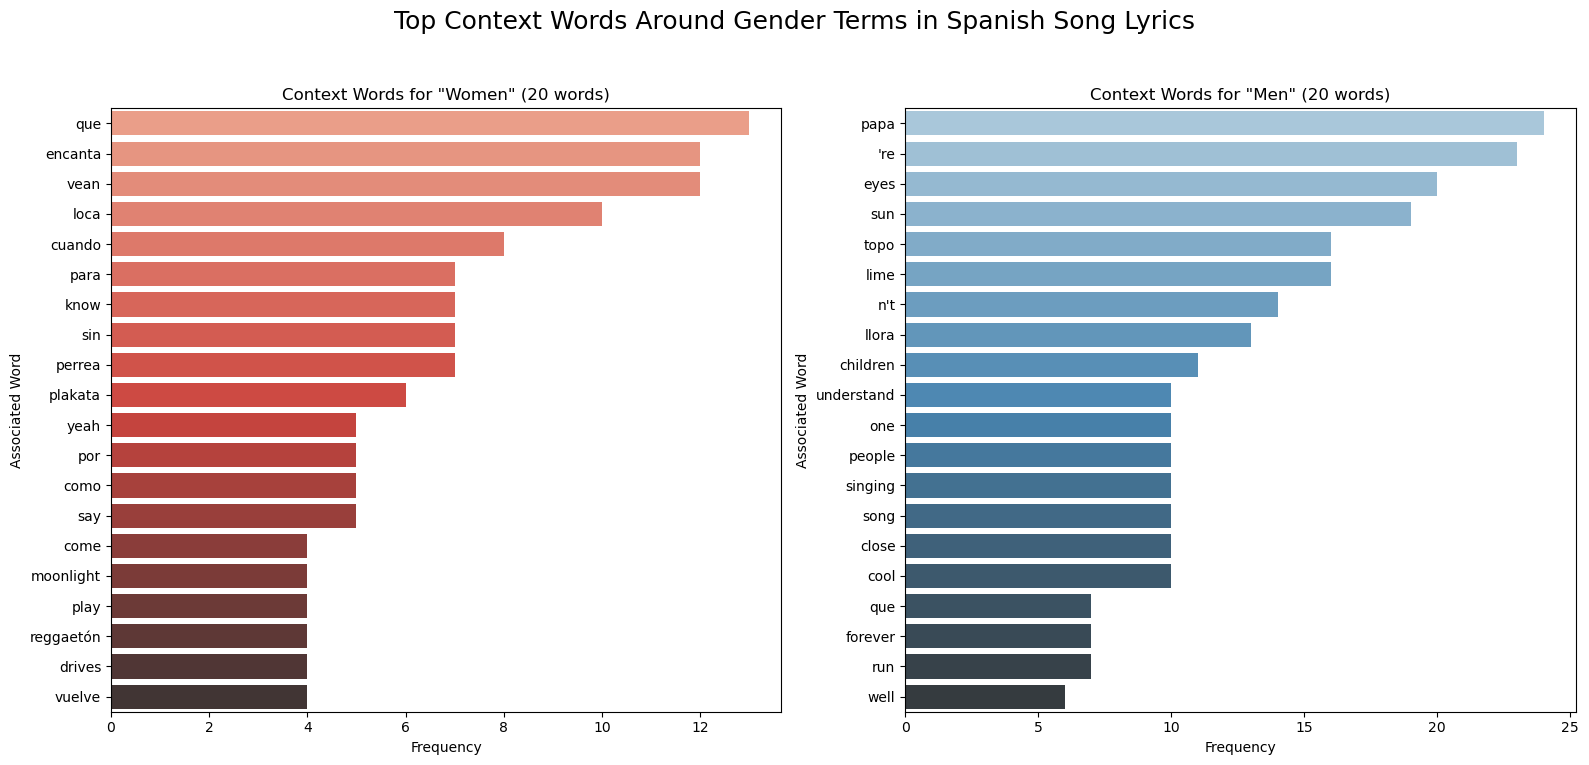

In [22]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import ast

SPANISH_PREPROCESSED_FILE = "song_lyrics_with_bert_emotion_es_final.csv"

try:
    df_es = pd.read_csv(SPANISH_PREPROCESSED_FILE)
    df_es['tokens_preprocessed'] = df_es['tokens'].apply(ast.literal_eval)
    print(f"Spanish DataFrame successfully loaded from {SPANISH_PREPROCESSED_FILE}.")
except FileNotFoundError:
    print(f"Error: Could not find the CSV file '{SPANISH_PREPROCESSED_FILE}'.")
    print("Please make sure your preprocessed Spanish CSV file exists.")
    print("You must first run the data cleaning and preprocessing steps for Spanish.")
    exit()
except KeyError:
    print("Error: Required column 'tokens_preprocessed' not found.")
    print("Please make sure the loaded CSV contains this column.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading: {e}")
    exit()

# Filter data
df_es_filtered = df_es[
    (df_es['tokens_preprocessed'].apply(lambda x: len(x) > 0))
].copy()

print(f"\nRemaining songs for analysis after initial filtering: {len(df_es_filtered)}")

if df_es_filtered.empty:
    print("No songs left after filtering for non-empty tokens. Please check your data.")
    exit()

# gender-related keywords and context window (Spanish)
print("\nDefining gender-related keywords and extracting contexts (Spanish)...")

female_keywords_es = ['mujer', 'mujeres', 'chica', 'chicas', 'niña', 'niñas', 'ella', 'ellas', 'señora', 'señoras', 'femenino']
male_keywords_es = ['hombre', 'hombres', 'chico', 'chicos', 'niño', 'niños', 'él', 'ellos', 'señor', 'señores', 'masculino']
all_gender_keywords_es = set(female_keywords_es + male_keywords_es)

context_window_size = 5

# context words around gender-related keywords
all_female_contexts_words_es = []
all_male_contexts_words_es = []
for index, row in df_es_filtered.iterrows():
    tokens = row['tokens_preprocessed']

    for i, token in enumerate(tokens):
        if token in female_keywords_es:
            start_index = max(0, i - context_window_size)
            context_before = tokens[start_index:i]

            end_index = min(len(tokens), i + context_window_size + 1)
            context_after = tokens[i+1:end_index]

            context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords_es]
            all_female_contexts_words_es.extend(context_words)

        elif token in male_keywords_es:
            start_index = max(0, i - context_window_size)
            context_before = tokens[start_index:i]

            end_index = min(len(tokens), i + context_window_size + 1)
            context_after = tokens[i+1:end_index]

            context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords_es]
            all_male_contexts_words_es.extend(context_words)

# Count word frequencies in contexts 
print("\nCounting word frequencies in contexts...")

female_context_counts_es = Counter(all_female_contexts_words_es)
male_context_counts_es = Counter(all_male_contexts_words_es)

topn_words = 20
top_female_context_words_es = female_context_counts_es.most_common(topn_words)
top_male_context_words_es = male_context_counts_es.most_common(topn_words)

# --- Display results ---
print("\n--- Results: Top words in the context of 'Women' (Spanish) ---")
if top_female_context_words_es:
    for word, count in top_female_context_words_es:
        print(f"  '{word}' ({count})")
else:
    print("  No significant context words found for 'Women' keywords.")

print("\n--- Results: Top words in the context of 'Men' (Spanish) ---")
if top_male_context_words_es:
    for word, count in top_male_context_words_es:
        print(f"  '{word}' ({count})")
else:
    print("  No significant context words found for 'Men' keywords.")

# --- Visualization ---
print("\n--- Visualization of context words (Spanish) ---")
if top_female_context_words_es or top_male_context_words_es:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
    fig.suptitle('Top Context Words Around Gender Terms in Spanish Song Lyrics', fontsize=18)

    if top_female_context_words_es:
        df_female_context_es = pd.DataFrame(top_female_context_words_es, columns=['word', 'count'])
        sns.barplot(x='count', y='word', data=df_female_context_es, ax=axes[0], palette='Reds_d')
        axes[0].set_title(f'Context Words for "Women" ({len(top_female_context_words_es)} words)')
        axes[0].set_xlabel('Frequency')
        axes[0].set_ylabel('Associated Word')
    else:
        axes[0].text(0.5, 0.5, 'No data for "Women" context',
                     horizontalalignment='center', verticalalignment='center',
                     transform=axes[0].transAxes, fontsize=12, color='gray')
        axes[0].set_title('Context Words for "Women"')
        axes[0].set_xticks([])
        axes[0].set_yticks([])
        axes[0].set_xlabel('')
        axes[0].set_ylabel('')

    if top_male_context_words_es:
        df_male_context_es = pd.DataFrame(top_male_context_words_es, columns=['word', 'count'])
        sns.barplot(x='count', y='word', data=df_male_context_es, ax=axes[1], palette='Blues_d')
        axes[1].set_title(f'Context Words for "Men" ({len(top_male_context_words_es)} words)')
        axes[1].set_xlabel('Frequency')
        axes[1].set_ylabel('Associated Word')
    else:
        axes[1].text(0.5, 0.5, 'No data for "Men" context',
                     horizontalalignment='center', verticalalignment='center',
                     transform=axes[1].transAxes, fontsize=12, color='gray')
        axes[1].set_title('Context Words for "Men"')
        axes[1].set_xticks([])
        axes[1].set_yticks([])
        axes[1].set_xlabel('')
        axes[1].set_ylabel('')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("No gender-related contexts found in lyrics for visualization.")


/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/1519283263.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_female_context_es, y='word', x='count', ax=axs[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/1519283263.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_male_context_es, y='word', x='count', ax=axs[1], palette='Blues_d')


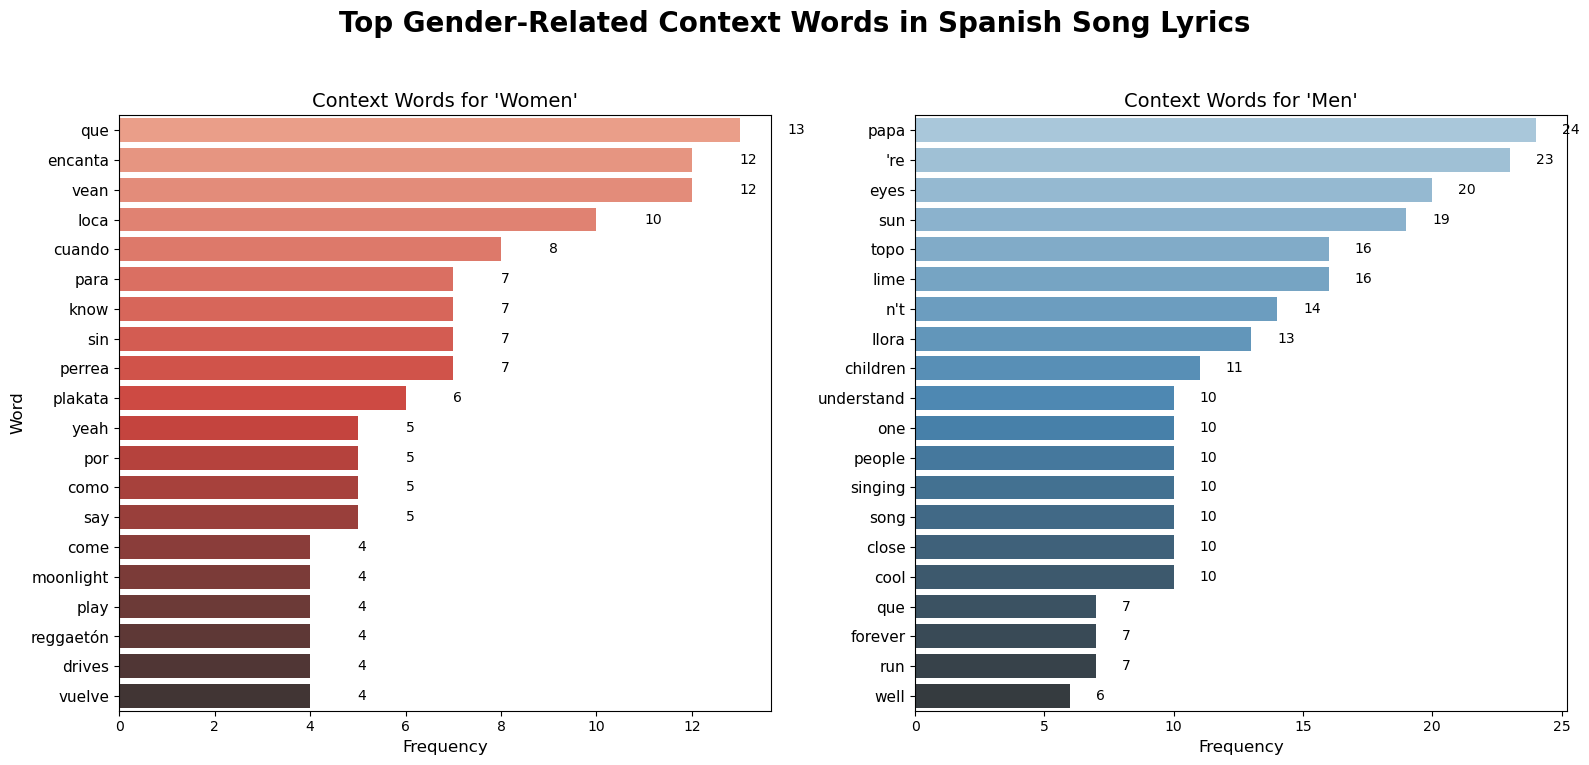

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_female_context_es = pd.DataFrame(top_female_context_words_es, columns=['word', 'count'])
df_male_context_es = pd.DataFrame(top_male_context_words_es, columns=['word', 'count'])


fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Top Gender-Related Context Words in Spanish Song Lyrics", fontsize=20, fontweight='bold')

# context women
sns.barplot(data=df_female_context_es, y='word', x='count', ax=axs[0], palette='Reds_d')
axs[0].set_title("Context Words for 'Women'", fontsize=14)
axs[0].set_xlabel("Frequency", fontsize=12)
axs[0].set_ylabel("Word", fontsize=12)
axs[0].tick_params(axis='y', labelsize=11)

# context men
sns.barplot(data=df_male_context_es, y='word', x='count', ax=axs[1], palette='Blues_d')
axs[1].set_title("Context Words for 'Men'", fontsize=14)
axs[1].set_xlabel("Frequency", fontsize=12)
axs[1].set_ylabel("")  # Doppelte y-Achse vermeiden
axs[1].tick_params(axis='y', labelsize=11)


for ax, df in zip(axs, [df_female_context_es, df_male_context_es]):
    for i, row in df.iterrows():
        ax.text(row['count'] + 1, i, str(row['count']), color='black', va='center', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Time

In [24]:
from collections import defaultdict, Counter

# Store context counts per decade and gender
decade_female_contexts = defaultdict(Counter)
decade_male_contexts = defaultdict(Counter)

# distribution in decades
def get_decade(year):
    if 1990 <= year < 2000:
        return '1990s'
    elif 2000 <= year < 2010:
        return '2000s'
    elif 2010 <= year < 2020:
        return '2010s'
    else:
        return None  


df_es_filtered['decade'] = df_es_filtered['year'].apply(get_decade)


decades = ['1990s', '2000s', '2010s']

for decade in decades:
    df_decade = df_es_filtered[df_es_filtered['decade'] == decade]

    for tokens in df_decade['tokens_preprocessed']:
        for i, token in enumerate(tokens):
            if token in female_keywords_es:
                start = max(0, i - context_window_size)
                end = min(len(tokens), i + context_window_size + 1)
                context = tokens[start:i] + tokens[i+1:end]
                context = [w for w in context if w not in all_gender_keywords_es]
                decade_female_contexts[decade].update(context)
            
            elif token in male_keywords_es:
                start = max(0, i - context_window_size)
                end = min(len(tokens), i + context_window_size + 1)
                context = tokens[start:i] + tokens[i+1:end]
                context = [w for w in context if w not in all_gender_keywords_es]
                decade_male_contexts[decade].update(context)

topn = 10

print("\n--- Top context words for FEMALE-related terms per decade ---")
for decade in decades:
    print(f"\nDecade {decade}:")
    for word, count in decade_female_contexts[decade].most_common(topn):
        print(f"  {word} ({count})")

print("\n--- Top context words for MALE-related terms per decade ---")
for decade in decades:
    print(f"\nDecade {decade}:")
    for word, count in decade_male_contexts[decade].most_common(topn):
        print(f"  {word} ({count})")



--- Top context words for FEMALE-related terms per decade ---

Decade 1990s:

Decade 2000s:
  say (5)
  moonlight (4)
  know (3)
  come (3)
  que (3)
  por (3)
  bonita (3)
  ven (2)
  king (2)
  sir (2)

Decade 2010s:
  encanta (12)
  vean (12)
  que (10)
  loca (9)
  cuando (8)
  para (7)
  perrea (7)
  plakata (6)
  sin (6)
  play (4)

--- Top context words for MALE-related terms per decade ---

Decade 1990s:
  papa (24)
  're (23)
  eyes (20)
  sun (18)
  children (11)
  n't (11)
  understand (10)
  one (10)
  people (10)
  singing (10)

Decade 2000s:
  lloras (5)
  ese (5)
  narco (4)
  trafficante (4)
  quiero (3)
  cocaina (2)
  familia (2)
  shit (2)
  los (2)
  por (2)

Decade 2010s:
  topo (16)
  lime (16)
  llora (13)
  well (6)
  que (5)
  'll (5)
  yeah (4)
  fine (4)
  por (4)
  soy (3)


### Genre

In [25]:
# Convert genre strings to actual lists 
df_es_filtered['artist_genres'] = df_es_filtered['artist_genres'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)


In [26]:
# Create one row per genre per song
df_by_genre = df_es_filtered.explode('artist_genres')
df_by_genre = df_by_genre.dropna(subset=['artist_genres'])  # Drop rows without any genre


In [27]:
from collections import defaultdict

# Store context counts per genre
genre_female_contexts = defaultdict(Counter)
genre_male_contexts = defaultdict(Counter)

all_genres = sorted(df_by_genre['artist_genres'].unique())

for genre in all_genres:
    df_genre = df_by_genre[df_by_genre['artist_genres'] == genre]

    for tokens in df_genre['tokens_preprocessed']:
        for i, token in enumerate(tokens):
            if token in female_keywords_es:
                start = max(0, i - context_window_size)
                end = min(len(tokens), i + context_window_size + 1)
                context = tokens[start:i] + tokens[i+1:end]
                context = [w for w in context if w not in all_gender_keywords_es]
                genre_female_contexts[genre].update(context)

            elif token in male_keywords_es:
                start = max(0, i - context_window_size)
                end = min(len(tokens), i + context_window_size + 1)
                context = tokens[start:i] + tokens[i+1:end]
                context = [w for w in context if w not in all_gender_keywords_es]
                genre_male_contexts[genre].update(context)


In [28]:
topn = 10
min_count_threshold = 3

print("\n--- Top female-related context words per genre (min 3 occurrences) ---")
for genre in all_genres:
    filtered_words = [(word, count) for word, count in genre_female_contexts[genre].most_common(topn) if count >= min_count_threshold]
    
    if filtered_words:  # Only print genres with at least one word meeting the threshold
        print(f"\nGenre: {genre}")
        for word, count in filtered_words:
            print(f"  {word} ({count})")

print("\n--- Top male-related context words per genre (min 3 occurrences) ---")
for genre in all_genres:
    filtered_words = [(word, count) for word, count in genre_male_contexts[genre].most_common(topn) if count >= min_count_threshold]
    
    if filtered_words:
        print(f"\nGenre: {genre}")
        for word, count in filtered_words:
            print(f"  {word} ({count})")




--- Top female-related context words per genre (min 3 occurrences) ---

Genre: argentine trap
  keo (3)

Genre: bachata
  por (3)

Genre: bachata pop
  por (3)

Genre: italian singer-songwriter
  moonlight (4)

Genre: italo dance
  moonlight (4)

Genre: latin
  encanta (12)
  vean (12)
  que (10)
  loca (9)
  cuando (8)
  perrea (7)
  plakata (6)
  sin (6)
  para (6)
  play (4)

Genre: r&b
  say (5)

Genre: reggaeton
  encanta (12)
  vean (12)
  que (10)
  loca (9)
  cuando (8)
  perrea (7)
  plakata (6)
  sin (6)
  para (6)
  play (4)

Genre: trap
  keo (3)

--- Top male-related context words per genre (min 3 occurrences) ---

Genre: alt country
  topo (16)
  lime (16)
  well (6)
  'll (5)
  fine (4)
  yeah (3)

Genre: americana
  topo (16)
  lime (16)
  well (6)
  'll (5)
  fine (4)
  yeah (3)

Genre: bachata
  llora (13)
  por (6)
  que (6)
  lloras (5)
  ese (5)
  daddy (3)

Genre: bachata pop
  lloras (5)
  ese (5)

Genre: disco
  papa (24)
  're (23)
  eyes (20)
  sun (18)
  chi

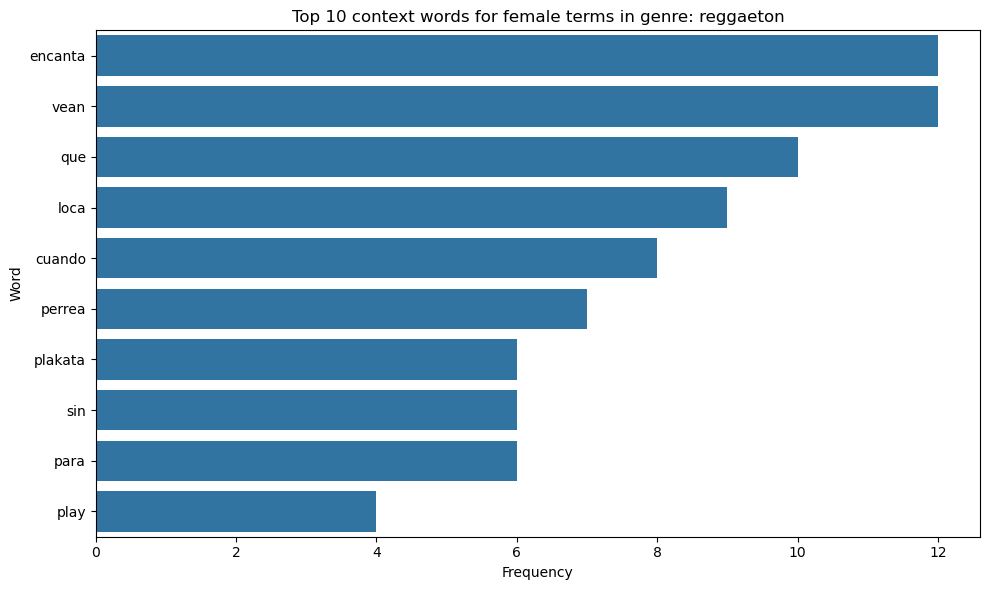

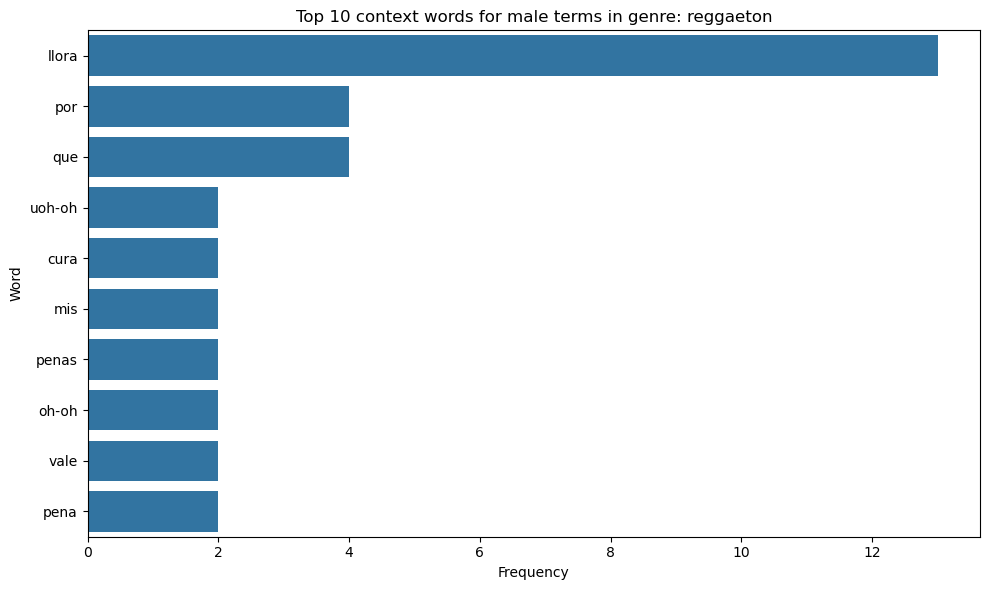

In [29]:
def plot_top_context_words_for_genre(context_dict, genre, gender_label, topn=10):
    top_words = context_dict.get(genre, Counter()).most_common(topn)
    if not top_words:
        print(f"No context words found for {gender_label} in genre: {genre}")
        return
    
    df_plot = pd.DataFrame(top_words, columns=["word", "count"])
    plt.figure(figsize=(10, 6))
    sns.barplot(x="count", y="word", data=df_plot)
    plt.title(f"Top {topn} context words for {gender_label} terms in genre: {genre}")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()


plot_top_context_words_for_genre(genre_female_contexts, "reggaeton", "female")
plot_top_context_words_for_genre(genre_male_contexts, "reggaeton", "male")


/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/1318533213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_plot, x="count", y="word", col="genre", kind="bar", col_wrap=3,


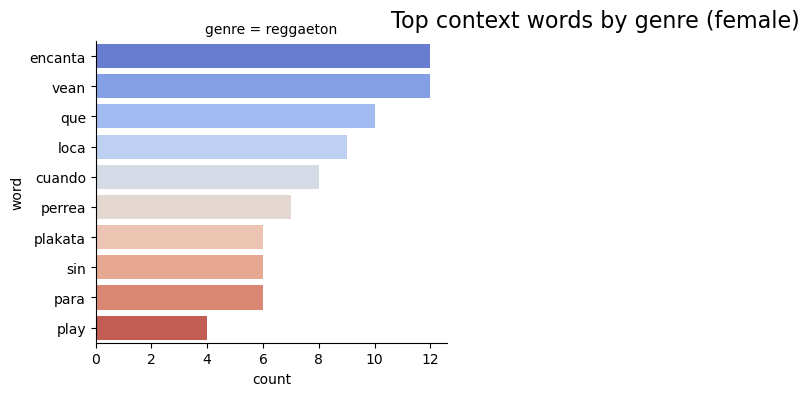

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_71553/1318533213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_plot, x="count", y="word", col="genre", kind="bar", col_wrap=3,


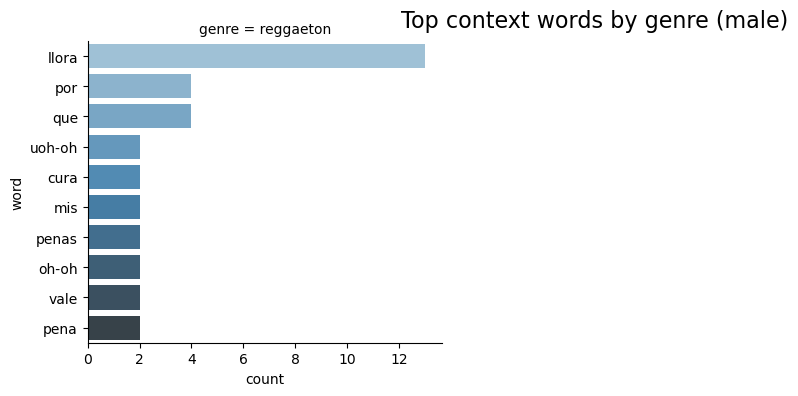

<Figure size 640x480 with 0 Axes>

In [42]:
def plot_facet_contexts(context_dict, gender_label, genres_to_plot, topn=10):
    data = []
    for genre in genres_to_plot:
        top_words = context_dict.get(genre, Counter()).most_common(topn)
        for word, count in top_words:
            data.append({"genre": genre, "word": word, "count": count})

    if not data:
        print(f"No data available for {gender_label} terms.")
        return

    df_plot = pd.DataFrame(data)
    g = sns.catplot(data=df_plot, x="count", y="word", col="genre", kind="bar", col_wrap=3,
                    height=4, sharex=False, sharey=False, palette="coolwarm" if gender_label == "female" else "Blues_d")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f"Top context words by genre ({gender_label})", fontsize=16)
    plt.show()


selected_genres = ["reggaeton", "pop", "rock"]

plot_facet_contexts(genre_female_contexts, "female", selected_genres)
plot_facet_contexts(genre_male_contexts, "male", selected_genres)

plt.savefig("reggaeton_female.png", dpi=300, bbox_inches='tight')



### Country level

In [43]:

df_es_filtered['country'] = df_es_filtered['country'].str.strip().str.lower()


In [44]:
from collections import defaultdict

# Store context counts per country
country_female_contexts = defaultdict(Counter)
country_male_contexts = defaultdict(Counter)

all_countries = sorted(df_es_filtered['country'].dropna().unique())

for country in all_countries:
    df_country = df_es_filtered[df_es_filtered['country'] == country]

    for tokens in df_country['tokens_preprocessed']:
        for i, token in enumerate(tokens):
            if token in female_keywords_es:
                start = max(0, i - context_window_size)
                end = min(len(tokens), i + context_window_size + 1)
                context = tokens[start:i] + tokens[i+1:end]
                context = [w for w in context if w not in all_gender_keywords_es]
                country_female_contexts[country].update(context)

            elif token in male_keywords_es:
                start = max(0, i - context_window_size)
                end = min(len(tokens), i + context_window_size + 1)
                context = tokens[start:i] + tokens[i+1:end]
                context = [w for w in context if w not in all_gender_keywords_es]
                country_male_contexts[country].update(context)


In [45]:
topn = 10

print("\n--- Top female-related context words per country ---")
for country in all_countries:
    print(f"\nCountry: {country}")
    for word, count in country_female_contexts[country].most_common(topn):
        print(f"  {word} ({count})")

print("\n--- Top male-related context words per country ---")
for country in all_countries:
    print(f"\nCountry: {country}")
    for word, count in country_male_contexts[country].most_common(topn):
        print(f"  {word} ({count})")



--- Top female-related context words per country ---

Country: br
  siente (1)
  corazón (1)
  latir (1)
  yeah (1)
  déjalo (1)
  ser (1)
  come (1)
  join (1)
  vámono (1)

Country: ca

Country: de
  muy (2)
  está (1)
  caliente (1)
  así (1)
  valientes (1)
  nunca (1)
  atrás (1)
  estamos (1)
  frente (1)

Country: es
  keo (3)
  never (2)
  knew (2)
  love (2)
  por (2)
  aquí (1)
  sicario (1)
  todos (1)
  los (1)
  sacones (1)

Country: fi

Country: fr
  n't (2)
  cover (1)
  one (1)
  yeah (1)
  favorite (1)
  positions (1)
  stress (1)
  movin (1)
  baby (1)

Country: gb
  mai (2)
  contributorstranslationsportuguêsput (1)
  lyricssheeran (1)
  boo (1)
  rnb (1)
  singer (1)
  sing (1)
  someone (1)
  love (1)
  always (1)

Country: it
  moonlight (4)
  ven (2)
  questa (1)
  luna (1)
  piena (1)
  cocca (1)
  keep (1)
  shakin (1)
  know (1)
  tonight (1)

Country: jm

Country: jp

Country: mx

Country: nl

Country: ph
  king (2)
  sir (2)
  duke (2)
  voice (2)
  like (2

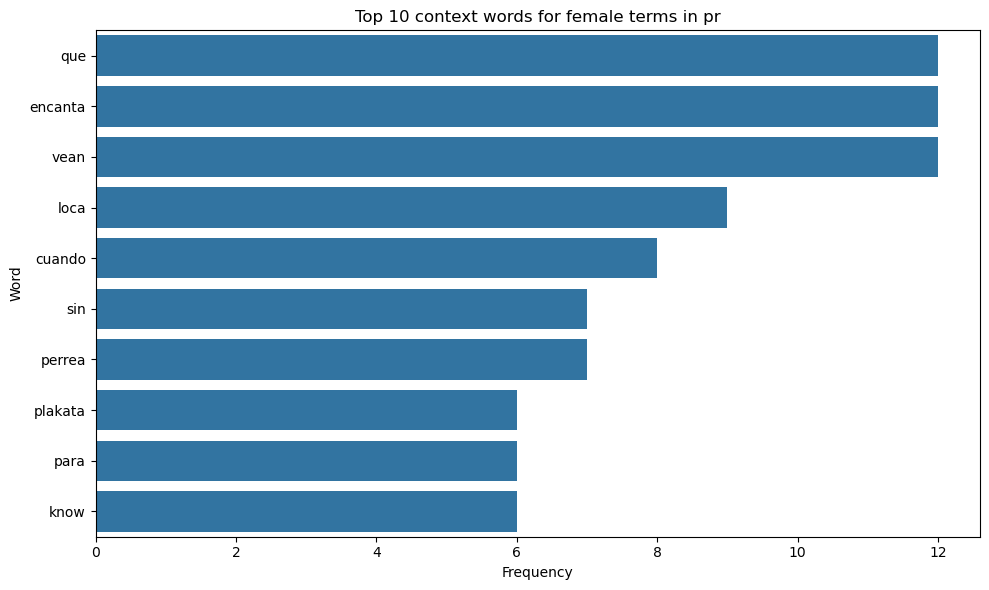

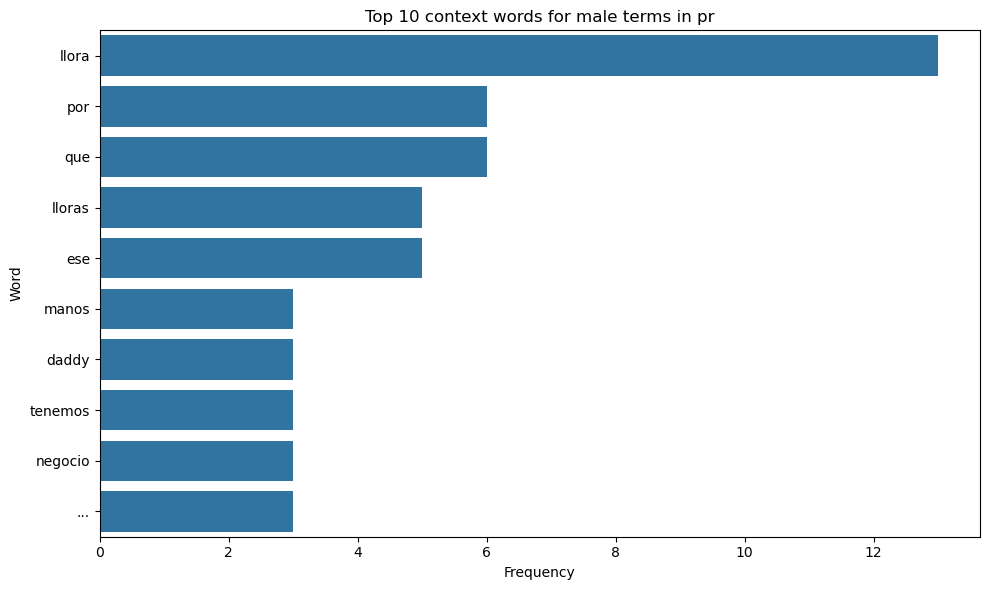

In [49]:
def plot_top_context_words_for_country(context_dict, country, gender_label, topn=10):
    top_words = context_dict.get(country, Counter()).most_common(topn)
    if not top_words:
        print(f"No context words found for {gender_label} in country: {country}")
        return

    df_plot = pd.DataFrame(top_words, columns=["word", "count"])
    plt.figure(figsize=(10, 6))
    sns.barplot(x="count", y="word", data=df_plot)
    plt.title(f"Top {topn} context words for {gender_label} terms in {country}")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()


plot_top_context_words_for_country(country_female_contexts, "pr", "female")
plot_top_context_words_for_country(country_male_contexts, "pr", "male")


### Popularity Score

In [50]:
def categorize_artist_popularity(score):
    if pd.isnull(score):
        return None
    elif score <= 33:
        return 'low'
    elif score <= 66:
        return 'medium'
    else:
        return 'high'

df_es_filtered['popularity_group'] = df_es_filtered['artist_popularity'].apply(categorize_artist_popularity)


In [51]:
from collections import defaultdict

popularity_female_contexts = defaultdict(Counter)
popularity_male_contexts = defaultdict(Counter)

popularity_groups = ['low', 'medium', 'high']

for group in popularity_groups:
    df_group = df_es_filtered[df_es_filtered['popularity_group'] == group]

    for tokens in df_group['tokens_preprocessed']:
        for i, token in enumerate(tokens):
            if token in female_keywords_es:
                start = max(0, i - context_window_size)
                end = min(len(tokens), i + context_window_size + 1)
                context = tokens[start:i] + tokens[i+1:end]
                context = [w for w in context if w not in all_gender_keywords_es]
                popularity_female_contexts[group].update(context)

            elif token in male_keywords_es:
                start = max(0, i - context_window_size)
                end = min(len(tokens), i + context_window_size + 1)
                context = tokens[start:i] + tokens[i+1:end]
                context = [w for w in context if w not in all_gender_keywords_es]
                popularity_male_contexts[group].update(context)


In [52]:
topn = 10

print("\n--- Top female-related context words by artist popularity group ---")
for group in popularity_groups:
    print(f"\nGroup: {group}")
    for word, count in popularity_female_contexts[group].most_common(topn):
        print(f"  {word} ({count})")

print("\n--- Top male-related context words by artist popularity group ---")
for group in popularity_groups:
    print(f"\nGroup: {group}")
    for word, count in popularity_male_contexts[group].most_common(topn):
        print(f"  {word} ({count})")



--- Top female-related context words by artist popularity group ---

Group: low

Group: medium
  moonlight (4)
  ven (2)
  king (2)
  sir (2)
  duke (2)
  voice (2)
  like (2)
  ringing (2)
  way (2)
  band (2)

Group: high
  que (12)
  encanta (12)
  vean (12)
  loca (9)
  cuando (8)
  para (7)
  sin (7)
  perrea (7)
  plakata (6)
  know (6)

--- Top male-related context words by artist popularity group ---

Group: low

Group: medium
  topo (16)
  lime (16)
  well (6)
  'll (5)
  narco (4)
  trafficante (4)
  n't (4)
  fine (4)
  quiero (3)
  yeah (3)

Group: high
  papa (24)
  're (23)
  eyes (20)
  sun (18)
  llora (13)
  children (11)
  n't (10)
  understand (10)
  one (10)
  people (10)


### Relationship Gender Artist

In [53]:

df_es_filtered['gender'] = df_es_filtered['gender'].str.lower().str.strip()


artist_gender_groups = ['female', 'male']  


In [54]:
from collections import defaultdict

artist_female_contexts_about_females = defaultdict(Counter)
artist_female_contexts_about_males = defaultdict(Counter)
artist_male_contexts_about_females = defaultdict(Counter)
artist_male_contexts_about_males = defaultdict(Counter)

for artist_gender in artist_gender_groups:
    df_group = df_es_filtered[df_es_filtered['gender'] == artist_gender]

    for tokens in df_group['tokens_preprocessed']:
        for i, token in enumerate(tokens):
            if token in female_keywords_es:
                start = max(0, i - context_window_size)
                end = min(len(tokens), i + context_window_size + 1)
                context = tokens[start:i] + tokens[i+1:end]
                context = [w for w in context if w not in all_gender_keywords_es]
                
                if artist_gender == "female":
                    artist_female_contexts_about_females[artist_gender].update(context)
                elif artist_gender == "male":
                    artist_male_contexts_about_females[artist_gender].update(context)

            elif token in male_keywords_es:
                start = max(0, i - context_window_size)
                end = min(len(tokens), i + context_window_size + 1)
                context = tokens[start:i] + tokens[i+1:end]
                context = [w for w in context if w not in all_gender_keywords_es]
                
                if artist_gender == "female":
                    artist_female_contexts_about_males[artist_gender].update(context)
                elif artist_gender == "male":
                    artist_male_contexts_about_males[artist_gender].update(context)


In [55]:
topn = 10

print("\n--- Female artists referring to WOMEN ---")
for word, count in artist_female_contexts_about_females["female"].most_common(topn):
    print(f"  {word} ({count})")

print("\n--- Female artists referring to MEN ---")
for word, count in artist_female_contexts_about_males["female"].most_common(topn):
    print(f"  {word} ({count})")

print("\n--- Male artists referring to WOMEN ---")
for word, count in artist_male_contexts_about_females["male"].most_common(topn):
    print(f"  {word} ({count})")

print("\n--- Male artists referring to MEN ---")
for word, count in artist_male_contexts_about_males["male"].most_common(topn):
    print(f"  {word} ({count})")



--- Female artists referring to WOMEN ---
  n't (2)
  king (2)
  sir (2)
  duke (2)
  voice (2)
  like (2)
  ringing (2)
  way (2)
  band (2)
  could (2)

--- Female artists referring to MEN ---
  papa (24)
  're (23)
  eyes (20)
  sun (19)
  children (11)
  n't (10)
  understand (10)
  one (10)
  people (10)
  singing (10)

--- Male artists referring to WOMEN ---
  que (13)
  encanta (12)
  vean (12)
  loca (10)
  cuando (8)
  para (7)
  know (7)
  sin (7)
  perrea (7)
  plakata (6)

--- Male artists referring to MEN ---
  topo (16)
  lime (16)
  llora (13)
  que (7)
  well (6)
  por (6)
  yeah (5)
  'll (5)
  lloras (5)
  ese (5)
